<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC2010.500 (Intelligent Systems)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<h4>Names: Carlos Daniel Ventura Carreón</h4>    <h4>Students ID:A01187731</h4>    <h4>Github:</h4>

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Sistemas Inteligentes</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Doom vs Animal Crossing](#e)

-----

5. [Conclusiones](#d)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Intentar presentar un enfoque completo para modelar problemas, que va desde el análisis exploratorio de datos hasta la aplicación de técnicas de aprendizaje supervisado y no supervisado a nuestros datos.

El contenido de esta notebook está dirigido principalmente para entender mejor las etapas que se realizan en los problemas de Ciencia de Datos y Aprendizaje Máquina (y posiblemente en Aprendizaje Profundo).

In [ ]:
En este proyecto se seleccionó el trabajo de EDA de pokemon, además de que se implementó exitosamente el reconocimiento de 
imágenes con la parte del CNN con una tasa de éxito muy alta. 

<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

In [2]:
# Data manipulation libraries
import numpy as np 
import pandas as pd 

# Data visualisation 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Web scraping 
from bs4 import BeautifulSoup, Comment
from requests import get

#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn.model_selection import train_test_split

pkdx = pd.read_csv('pokedex_v2.csv')
pokemon = pd.read_csv('Pokemon.csv')

In [102]:
import hiplot as hip
testhip = hip.Experiment.from_dataframe(pkdx)
testhip.display()
#la correlacion entre puntos y estatus es notable

<IPython.core.display.Javascript object>

[Regresar a contenido](#general)

In [103]:
import hiplot as hip
testhip = hip.Experiment.from_dataframe(pokemon)
testhip.display()

<IPython.core.display.Javascript object>

In [107]:
#union de ambos datasets para la extennsion de categorias
result = pd.merge(pokemon, pkdx, on=['Name'])
#pero solo nos importan sus stats
X = result[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = result['status']

result.groupby('status').generation.describe()

count      mean       std  min  25%  50%  75%  max
status                                                           
Legendary       13.0  3.769231  1.589227  1.0  3.0  4.0  5.0  6.0
Mythical        11.0  4.000000  1.549193  1.0  3.5  4.0  5.0  6.0
Normal         660.0  3.263636  1.673740  1.0  2.0  3.0  5.0  6.0
Sub Legendary   20.0  3.150000  1.308877  1.0  2.0  3.0  4.0  5.0

In [12]:
from imblearn.over_sampling import RandomOverSampler

#Los normales estan sobremuestreados
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)



In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf')
alg3 = RF()
alg4 = DT()

In [121]:
from sklearn.metrics import accuracy_score
alg1.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0            0.928862           0.948113

In [122]:
alg2.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0            0.947154           0.971698

In [123]:
alg3.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})


Accurancy on Train  Accurancy on Test
0            0.997967           0.995283

In [124]:
alg4.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

Accurancy on Train  Accurancy on Test
0            0.997967           0.981132

In [131]:
test = np.array([[820.0,140.0,140.0,140.0,140.0,140.0,120.0], [520.0,40.0,40.0,40.0,140.0,140.0,120.0]])

In [133]:
alg1.predict(test)[0]


'Normal'

In [134]:
alg2.predict(test)[0]

'Legendary'

In [135]:
alg3.predict(test)[0]

'Legendary'

In [136]:
alg4.predict(test)[0]

'Mythical'

In [137]:
alg1.predict(test)[1]

'Normal'

In [138]:
alg2.predict(test)[1]

'Normal'

In [139]:
alg3.predict(test)[1]

'Normal'

In [140]:
alg4.predict(test)[1]

'Normal'

Los modelos resultaron mucho mas acertados con el ajuste del muestreo y con un split diferente de test-train; Tal vez sea una mera coincidencia del seed dado que no tiene puntaje perfecto en el entrenamiento pero si en la prueba. En la notebook original la primera iteración sin ajustes rondaba el 91% de precisión.

[Regresar a contenido](#general)

Sección 2

In [4]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import requests

from PIL import Image
from io import BytesIO

from collections import Counter
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

warnings.filterwarnings('ignore')

Total number of categories: 5
Total number of images in dataset: 1089


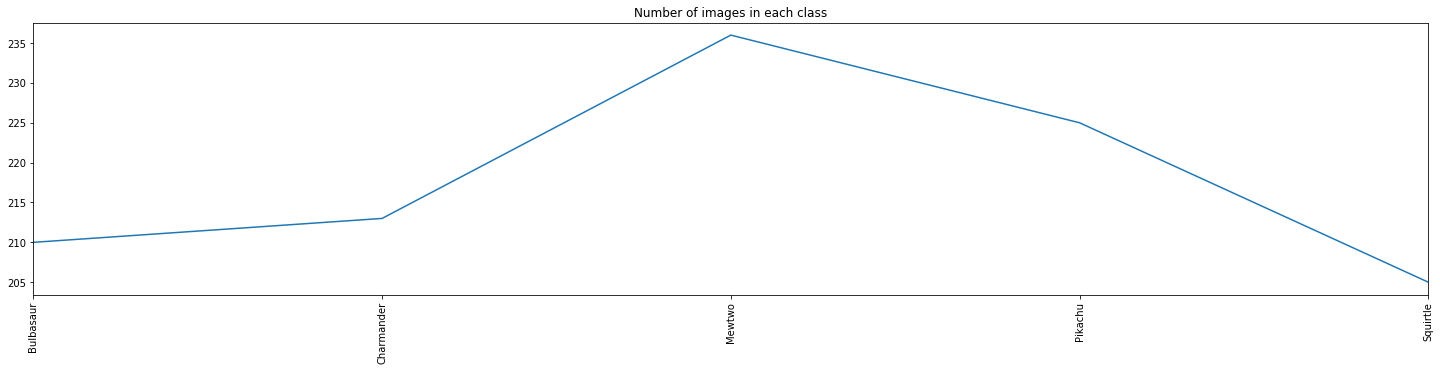

In [5]:
path = 'dataset/PokemonTrainData' # Path to directory which contains classes

classes = os.listdir(path) # List of all classes
print(f'Total number of categories: {len(classes)}')

# A dictionary which contains class and number of images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [6]:
# Sort our "counts" dictionary and selecting 5 classes with most number of images
imbalanced = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:5]
print(imbalanced)

# Taking only labels, it will come in handy in future
imbalanced = [i[0] for i in imbalanced]
print(imbalanced)

[('Mewtwo', 236), ('Pikachu', 225), ('Charmander', 213), ('Bulbasaur', 210), ('Squirtle', 205)]
['Mewtwo', 'Pikachu', 'Charmander', 'Bulbasaur', 'Squirtle']


In [7]:
X = [] # List for images
Y = [] # List for labels

# Loop through all classes
for c in classes:
    # We take only classes that we defined in 'imbalanced' list
    if c in imbalanced:
        dir_path = os.path.join(path, c)
        label = imbalanced.index(c) # Our label is an index of class in 'imbalanced' list
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            try:
                resized = cv.resize(image, (96, 96)) # Resizing images to (96, 96)
                X.append(resized)
                Y.append(label)
            
            # If we can't read image - we skip it
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue       
            
print('DONE')

DONE


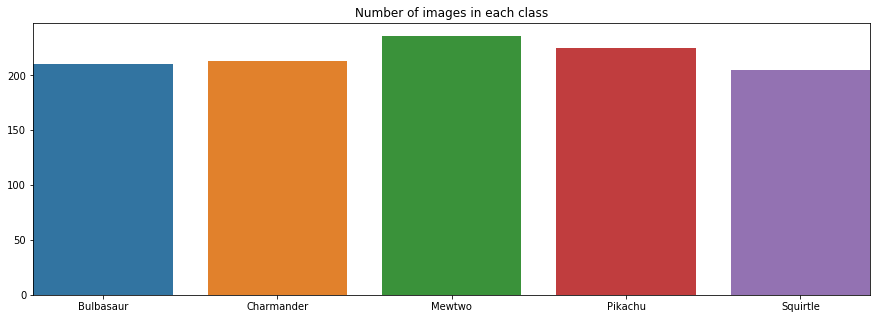

In [8]:
# Counting appearances of each label in labels list
obj = Counter(Y)

# Plotting number of images in each class
fig = plt.figure(figsize = (15, 5))
sns.barplot(x = [imbalanced[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images in each class')
plt.margins(x=0)
plt.show()

In [9]:
# Convert list with images to numpy array and reshape it 
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(imbalanced))

# Splitting data to train and test datasets
# I'll use these datasets only for training, for final predictions I'll use random pictures from internet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

In [10]:
# Defining ImageDataGenerator Iinstance
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

In [11]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(imbalanced), activation = 'softmax'))

# model.summary()

checkpoint = ModelCheckpoint('best_modeltest.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 100, validation_data = (X_test, y_test),
                             steps_per_epoch=len(X_train) // 32, callbacks = [checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 1.6115 - accuracy: 0.4493
Epoch 00001: val_accuracy improved from -inf to 0.35321, saving model to best_modeltest.hdf5
27/27 [==============================] - 33s 1s/step - loss: 1.6115 - accuracy: 0.4493 - val_loss: 3.5261 - val_accuracy: 0.3532
Epoch 2/100
27/27 [==============================] - ETA: 0s - loss: 1.1077 - accuracy: 0.6412
Epoch 00002: val_accuracy did not improve from 0.35321
27/27 [==============================] - 32s 1s/step - loss: 1.1077 - accuracy: 0.6412 - val_loss: 2.7016 - val_accuracy: 0.3394
Epoch 3/100
27/27 [==============================] - ETA: 0s - loss: 0.8418 - accuracy: 0.7199
Epoch 00003: val_accuracy improved from 0.35321 to 0.42661, saving model to best_modeltest.hdf5
27/27 [==============================] - 33s 1s/step - loss: 0.8418 - accuracy: 0.7199 - val_loss: 2.6992 - val_accuracy: 0.4266
Epoch 4/

Epoch 28/100
27/27 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9166
Epoch 00028: val_accuracy did not improve from 0.95872
27/27 [==============================] - 31s 1s/step - loss: 0.2436 - accuracy: 0.9166 - val_loss: 0.2881 - val_accuracy: 0.9037
Epoch 29/100
27/27 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9201
Epoch 00029: val_accuracy did not improve from 0.95872
27/27 [==============================] - 35s 1s/step - loss: 0.2453 - accuracy: 0.9201 - val_loss: 0.1178 - val_accuracy: 0.9541
Epoch 30/100
27/27 [==============================] - ETA: 0s - loss: 0.3430 - accuracy: 0.8868
Epoch 00030: val_accuracy improved from 0.95872 to 0.96330, saving model to best_modeltest.hdf5
27/27 [==============================] - 34s 1s/step - loss: 0.3430 - accuracy: 0.8868 - val_loss: 0.1307 - val_accuracy: 0.9633
Epoch 31/100
27/27 [==============================] - ETA: 0s - loss: 0.2467 - accuracy: 0.9225
Epoch 00031: val_accura

Epoch 57/100
27/27 [==============================] - ETA: 0s - loss: 0.1638 - accuracy: 0.9428
Epoch 00057: val_accuracy did not improve from 0.97248
27/27 [==============================] - 36s 1s/step - loss: 0.1638 - accuracy: 0.9428 - val_loss: 0.2078 - val_accuracy: 0.9587
Epoch 58/100
27/27 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9619
Epoch 00058: val_accuracy did not improve from 0.97248
27/27 [==============================] - 36s 1s/step - loss: 0.1039 - accuracy: 0.9619 - val_loss: 0.1507 - val_accuracy: 0.9587
Epoch 59/100
27/27 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9476
Epoch 00059: val_accuracy did not improve from 0.97248
27/27 [==============================] - 36s 1s/step - loss: 0.1685 - accuracy: 0.9476 - val_loss: 0.2180 - val_accuracy: 0.9404
Epoch 60/100
27/27 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9547
Epoch 00060: val_accuracy did not improve from 0.97248
27/27 [==

Epoch 86/100
27/27 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9631
Epoch 00086: val_accuracy did not improve from 0.99083
27/27 [==============================] - 35s 1s/step - loss: 0.1005 - accuracy: 0.9631 - val_loss: 0.0636 - val_accuracy: 0.9771
Epoch 87/100
27/27 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9523
Epoch 00087: val_accuracy did not improve from 0.99083
27/27 [==============================] - 34s 1s/step - loss: 0.1276 - accuracy: 0.9523 - val_loss: 0.1068 - val_accuracy: 0.9725
Epoch 88/100
27/27 [==============================] - ETA: 0s - loss: 0.2237 - accuracy: 0.9249
Epoch 00088: val_accuracy did not improve from 0.99083
27/27 [==============================] - 34s 1s/step - loss: 0.2237 - accuracy: 0.9249 - val_loss: 0.3539 - val_accuracy: 0.9266
Epoch 89/100
27/27 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 0.9416
Epoch 00089: val_accuracy did not improve from 0.99083
27/27 [==

Text(0.5, 1.0, 'loss')

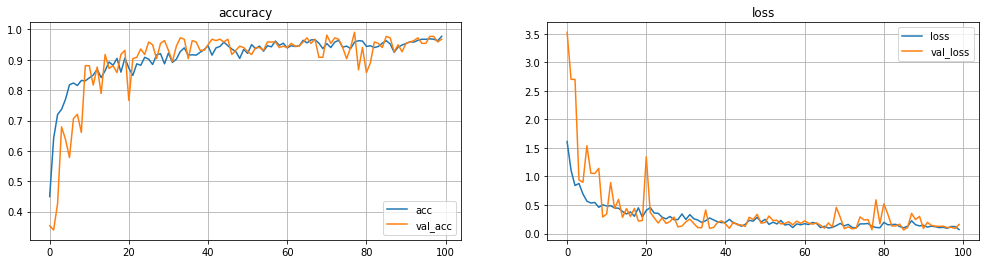

In [12]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [13]:
# Loading weights from best model
model.load_weights('best_modeltest.hdf5')

# Saving all model
model.save('modeltest.hdf5')

In [16]:
mewtwo = ['https://cdn.bulbagarden.net/upload/thumb/7/78/150Mewtwo.png/250px-150Mewtwo.png',
         'https://cdn.vox-cdn.com/thumbor/sZPPvUyKyF97UEU-nNtVnC3LpF8=/0x0:1750x941/1200x800/filters:focal(878x316:1158x596)/cdn.vox-cdn.com/uploads/chorus_image/image/63823444/original.0.jpg',
         'https://images-na.ssl-images-amazon.com/images/I/61j5ozFjJ0L._SL1024_.jpg']

pikachu = ['https://lh3.googleusercontent.com/proxy/DrjDlKlu9YonKbj3iNCJNJ3DGqzy9GjeXXSUv-TcVV4UN9PMCAM5yIkGLPG7wYo3UeA4sq5OmUWM8M6K5hy2KOAhf8SOL3zPH3axb2Xo3HX2XTU8M2xW4X6lVg=w720-h405-rw',
          'https://giantbomb1.cbsistatic.com/uploads/scale_medium/0/6087/2437349-pikachu.png',
          'https://johnlewis.scene7.com/is/image/JohnLewis/237525467']

charmander = ['https://img.pokemondb.net/artwork/large/charmander.jpg',
             'https://www.pokemoncenter.com/wcsstore/PokemonCatalogAssetStore/images/catalog/products/P5073/701-03990/P5073_701-03990_01.jpg',
             'https://static.posters.cz/image/750/%D0%A7%D0%B0%D1%88%D0%BA%D0%B0/pokemon-charmander-glow-i72513.jpg']

bulbasaur = ['https://img.pokemondb.net/artwork/large/bulbasaur.jpg',
            'https://ae01.alicdn.com/kf/HTB1aWullxSYBuNjSsphq6zGvVXaR/Big-Size-55-CM-Plush-Toy-Squirtle-Bulbasaur-Charmander-Toy-Sleeping-Pillow-Doll-For-Kid-Birthday.jpg',
            'https://cdn.bulbagarden.net/upload/thumb/f/f7/Bulbasaur_Detective_Pikachu.jpg/250px-Bulbasaur_Detective_Pikachu.jpg']

squirtle = ['https://assets.pokemon.com/assets/cms2/img/pokedex/full/007.png',
           'https://cdn.vox-cdn.com/thumbor/l4cKX7ZWargjs-zlxOSW2WZVgfI=/0x0:2040x1360/1200x800/filters:focal(857x517:1183x843)/cdn.vox-cdn.com/uploads/chorus_image/image/61498573/jbareham_180925_ply0802_0030.1537570476.jpg',
           'https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fdavidthier%2Ffiles%2F2018%2F07%2FSquirtle_Squad.jpg']

test_df = [mewtwo, pikachu, charmander, bulbasaur, squirtle]

[Regresar a contenido](#general)

In [17]:
import requests
# Lists to store our future data
val_x = []
val_y = []

for i, urls in enumerate(test_df):
    for url in urls:        
        r = requests.get(url, stream = True).raw
        image = np.asarray(bytearray(r.read()), dtype="uint8")
        image = cv.imdecode(image, cv.IMREAD_COLOR)
        val_x.append(image)
        val_y.append(i)

# plt.imshow(image[:, :, ::-1])

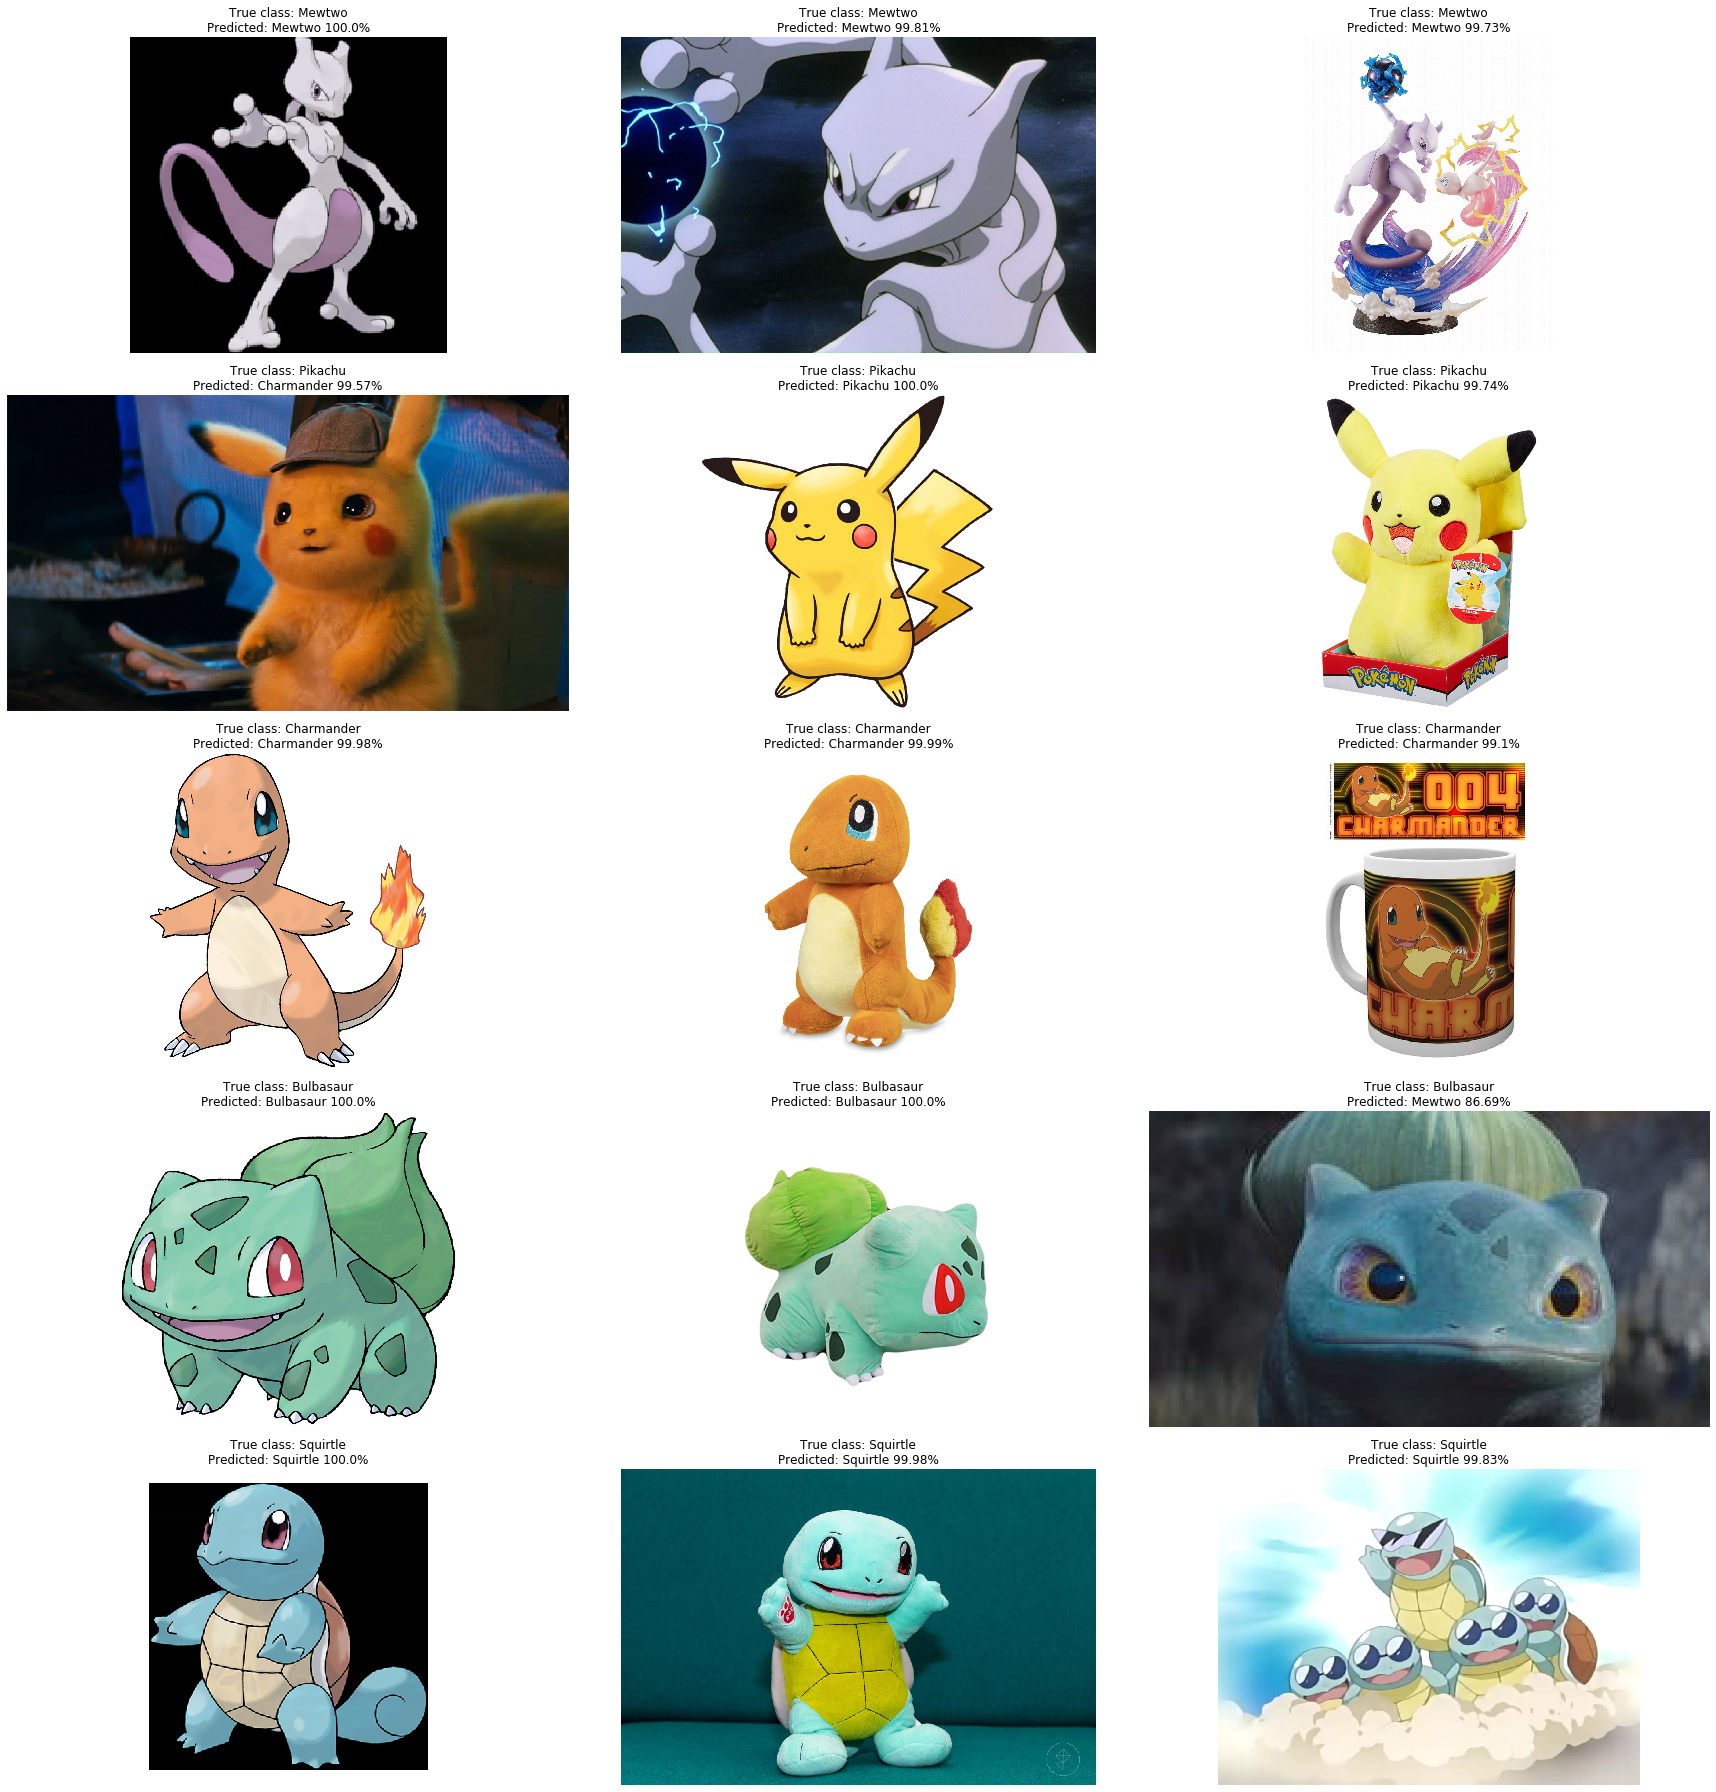

In [18]:
rows = 5
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image
    
    image = cv.resize(orig, (96, 96)) # Resizing image to (96, 96)
    image = image.reshape(-1, 96, 96, 3) / 255.0 # Reshape and scale resized image
    preds = model.predict(image) # Predicting image
    pred_class = np.argmax(preds) # Defining predicted class
    
    true_label = f'True class: {imbalanced[label]}'
    pred_label = f'Predicted: {imbalanced[pred_class]} {round(preds[0][pred_class] * 100, 2)}%'
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')
    
plt.tight_layout()

<a id="e"></a>
### 4. Doom vs Animal Crossing

---
[Regresar a contenido](#general)

Un analisis extra de un dataset con memes de reddit de doom y animal crossing

Total number of categories: 2
Total number of images in dataset: 1597


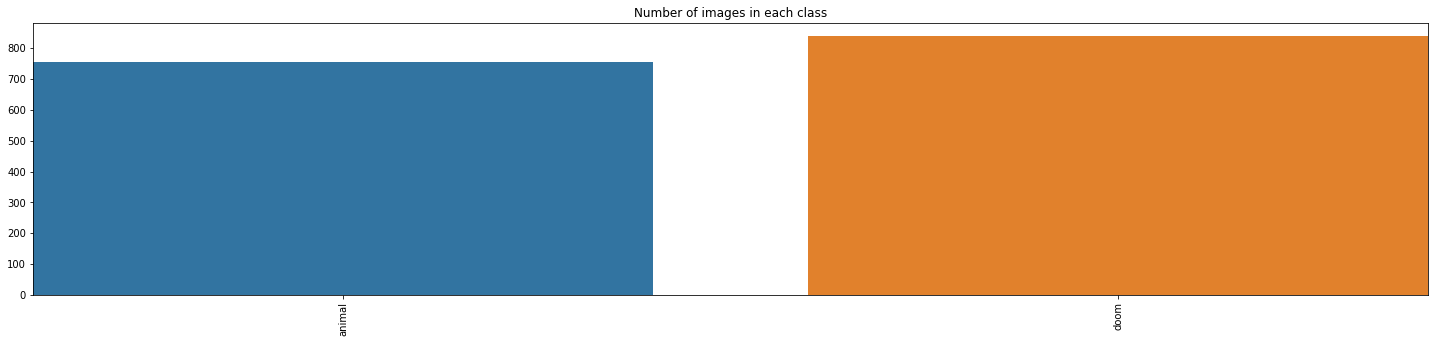

In [84]:
path = 'dataset2' # Path to directory which contains classes

classes = os.listdir(path) # List of all classes
print(f'Total number of categories: {len(classes)}')

# A dictionary which contains class and number of images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.barplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [91]:
# Convert list with images to numpy array and reshape it 
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(imbalanced))

# Splitting data to train and test datasets
# I'll use these datasets only for training, for final predictions I'll use random pictures from internet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

In [92]:
# Sort our "counts" dictionary and selecting 5 classes with most number of images
imbalanced = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:2]
print(imbalanced)

# Taking only labels, it will come in handy in future
imbalanced = [i[0] for i in imbalanced]
print(imbalanced)

[('doom', 840), ('animal', 757)]
['doom', 'animal']


In [93]:
X = [] # List for images
Y = [] # List for labels

# Loop through all classes
for c in classes:
    # We take only classes that we defined in 'imbalanced' list
    if c in imbalanced:
        dir_path = os.path.join(path, c)
        label = imbalanced.index(c) # Our label is an index of class in 'imbalanced' list
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            try:
                resized = cv.resize(image, (96, 96)) # Resizing images to (96, 96)
                X.append(resized)
                Y.append(label)
            
            # If we can't read image - we skip it
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue       
            
print('DONE')

DONE


In [94]:
# Defining ImageDataGenerator Iinstance
datagen = ImageDataGenerator(rotation_range = 90, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

In [96]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(imbalanced), activation = 'softmax'))

# model.summary()

checkpoint = ModelCheckpoint('doom_acrossing_modeltest.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 50, validation_data = (X_test, y_test),
                             steps_per_epoch=len(X_train) // 32, callbacks = [checkpoint])

Epoch 1/50
39/39 [==============================] - ETA: 0s - loss: 1.0018 - accuracy: 0.6225
Epoch 00001: val_accuracy improved from -inf to 0.43437, saving model to doom_acrossing_modeltest.hdf5
39/39 [==============================] - 57s 1s/step - loss: 1.0018 - accuracy: 0.6225 - val_loss: 3.5108 - val_accuracy: 0.4344
Epoch 2/50
39/39 [==============================] - ETA: 0s - loss: 0.7800 - accuracy: 0.6827
Epoch 00002: val_accuracy improved from 0.43437 to 0.49687, saving model to doom_acrossing_modeltest.hdf5
39/39 [==============================] - 62s 2s/step - loss: 0.7800 - accuracy: 0.6827 - val_loss: 1.4054 - val_accuracy: 0.4969
Epoch 3/50
39/39 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.7020
Epoch 00003: val_accuracy improved from 0.49687 to 0.51250, saving model to doom_acrossing_modeltest.hdf5
39/39 [==============================] - 55s 1s/step - loss: 0.6896 - accuracy: 0.7020 - val_loss: 1.3352 - val_accuracy: 0.5125
Epoch 4/50
39/39

Epoch 29/50
39/39 [==============================] - ETA: 0s - loss: 0.3980 - accuracy: 0.8129
Epoch 00029: val_accuracy did not improve from 0.76875
39/39 [==============================] - 48s 1s/step - loss: 0.3980 - accuracy: 0.8129 - val_loss: 0.6949 - val_accuracy: 0.6875
Epoch 30/50
39/39 [==============================] - ETA: 0s - loss: 0.4000 - accuracy: 0.8161
Epoch 00030: val_accuracy did not improve from 0.76875
39/39 [==============================] - 47s 1s/step - loss: 0.4000 - accuracy: 0.8161 - val_loss: 0.5436 - val_accuracy: 0.7594
Epoch 31/50
39/39 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8193
Epoch 00031: val_accuracy improved from 0.76875 to 0.77188, saving model to doom_acrossing_modeltest.hdf5
39/39 [==============================] - 50s 1s/step - loss: 0.3859 - accuracy: 0.8193 - val_loss: 0.4612 - val_accuracy: 0.7719
Epoch 32/50
39/39 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.8169
Epoch 00032: val_

Text(0.5, 1.0, 'loss')

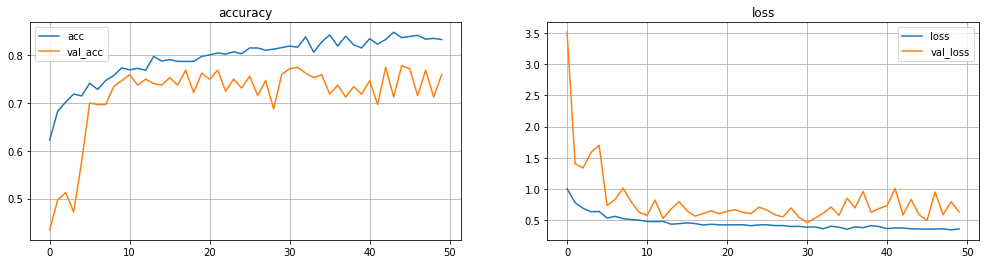

In [97]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [98]:
# Loading weights from best model
model.load_weights('doom_acrossing_modeltest.hdf5')

# Saving all model
model.save('doom_modeltest2.hdf5')

In [99]:
ac = ['https://arc-anglerfish-arc2-prod-infobae.s3.amazonaws.com/public/PPLANWCH3VCYHDBGPAV3BROTAE.jpg',
         'https://cdn.computerhoy.com/sites/navi.axelspringer.es/public/styles/480/public/media/image/2020/09/animal-crossing-new-horizons-joe-biden-kamala-harris-ee-uu-2051517.jpg?itok=HJjAoA3e',
         'https://i.chzbgr.com/full/9486735360/h3304A3CE/sell-on-sunday-scerr-after-stalk-market-burned-last-week-am-ready-get-hurt-ag-made-with-mematic']

doom = ['https://i.pinimg.com/originals/c7/64/83/c76483b784984252de294bca1763e954.jpg',
          'https://static.wikia.nocookie.net/wadguia/images/a/ab/D4_Doom_Slayer.jpg/revision/latest/scale-to-width-down/340?cb=20171206233449',
          'https://external-preview.redd.it/Cd5l8Tk3BJ-BdeJoNFcmMXqEUK_llP6FOv6G_wIExJU.jpg?auto=webp&s=64227a1ef0d63a9a2ba77eba2f902c41f0ffbe9d']


test_df = [doom, ac]

In [100]:
import requests
# Lists to store our future data
val_x = []
val_y = []

for i, urls in enumerate(test_df):
    for url in urls:        
        r = requests.get(url, stream = True).raw
        image = np.asarray(bytearray(r.read()), dtype="uint8")
        image = cv.imdecode(image, cv.IMREAD_COLOR)
        val_x.append(image)
        val_y.append(i)

# plt.imshow(image[:, :, ::-1])

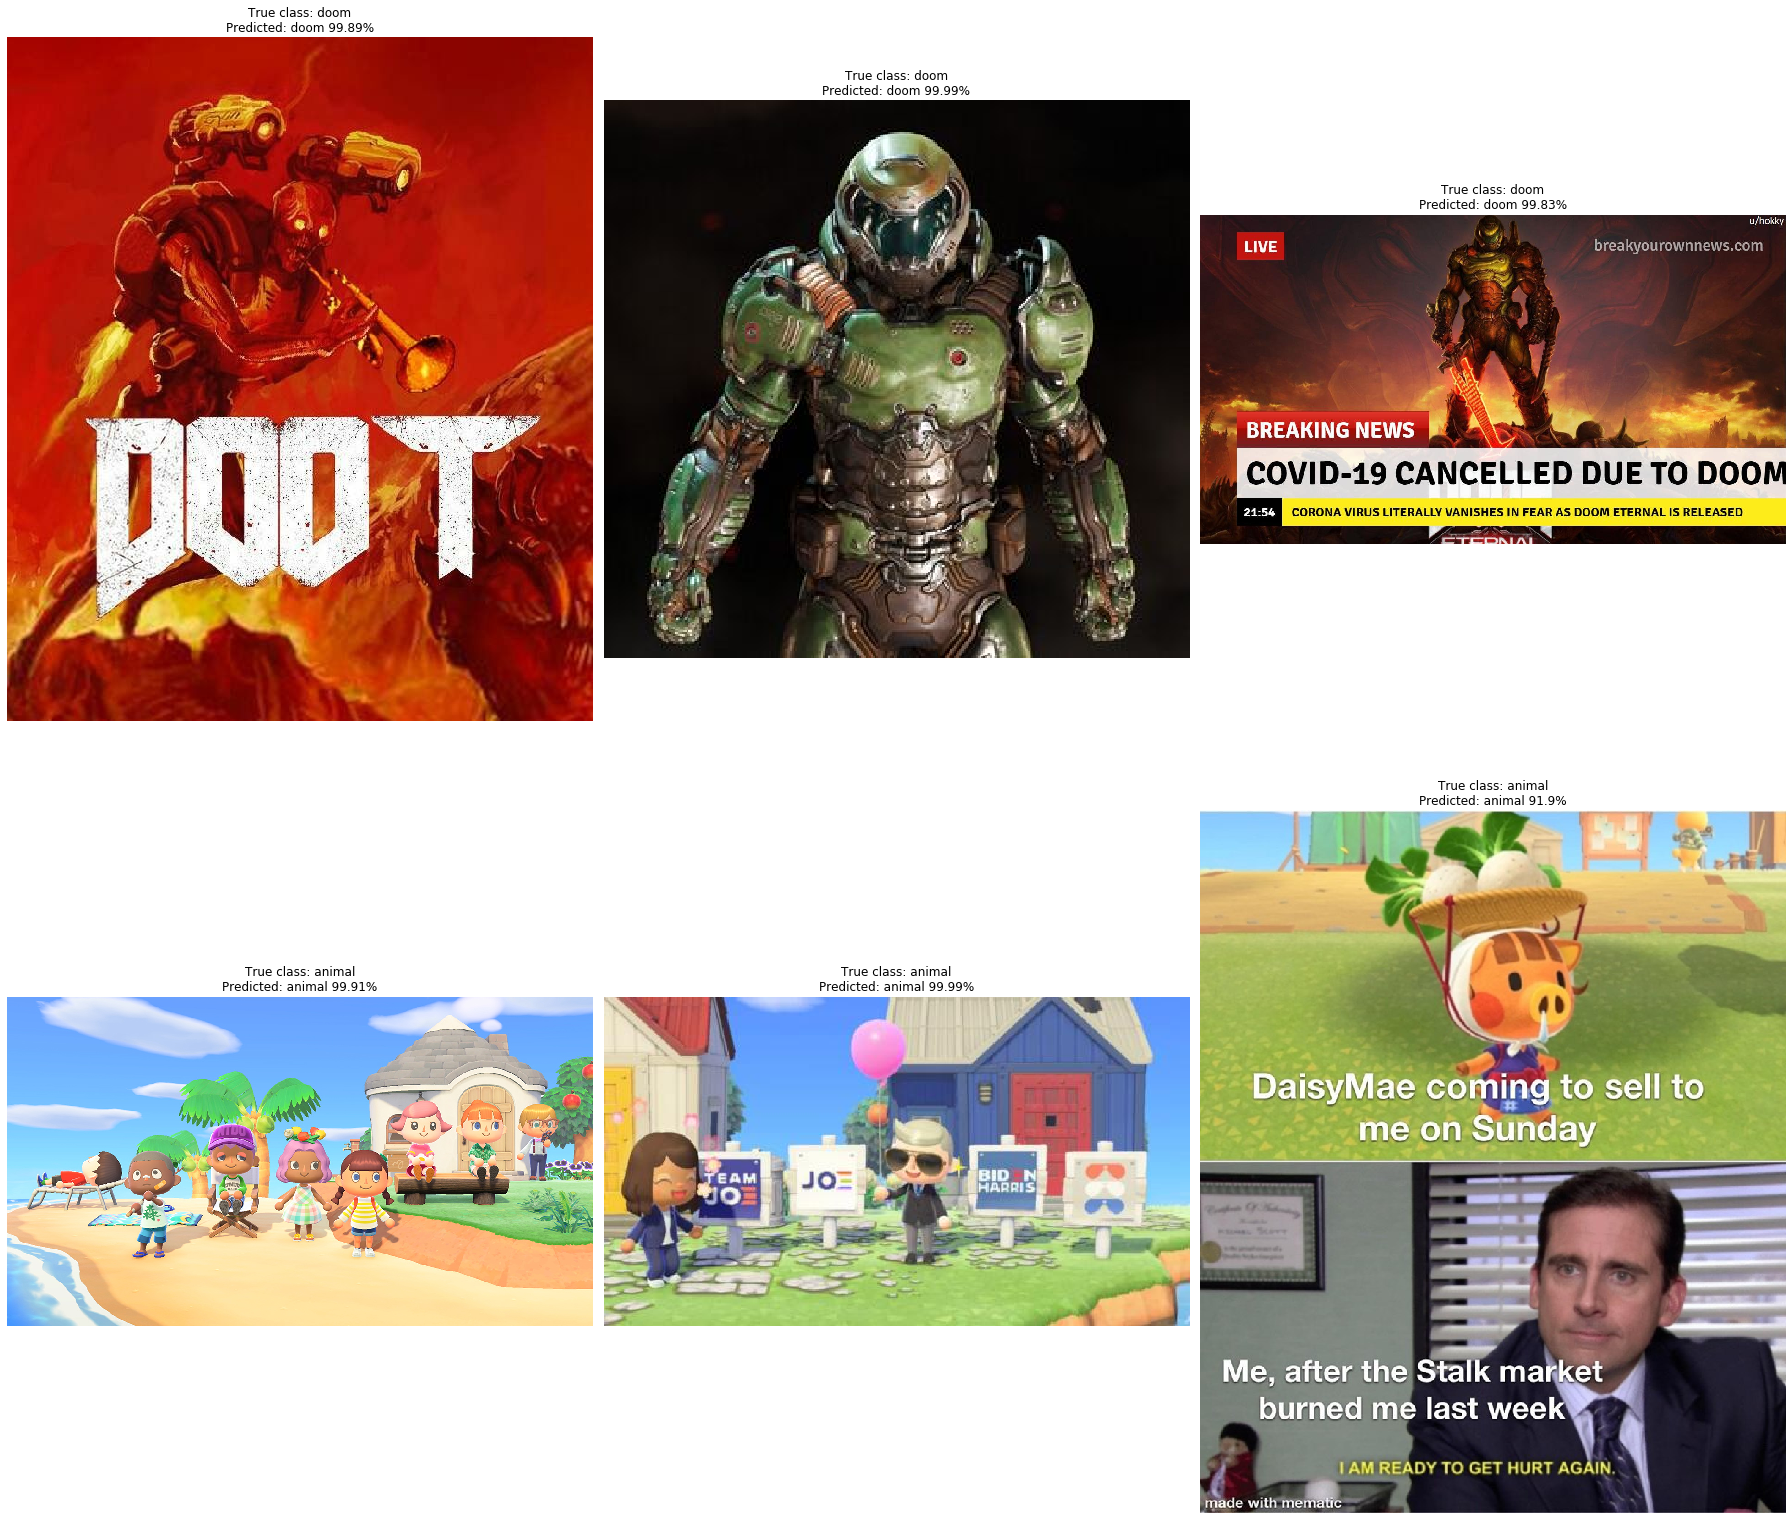

In [101]:
rows = 2
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image
    
    image = cv.resize(orig, (96, 96)) # Resizing image to (96, 96)
    image = image.reshape(-1, 96, 96, 3) / 255.0 # Reshape and scale resized image
    preds = model.predict(image) # Predicting image
    pred_clas = np.argmax(preds) # Defining predicted class
    
    true_label = f'True class: {imbalanced[label]}'
    pred_label = f'Predicted: {imbalanced[pred_clas]} {round(preds[0][pred_clas] * 100, 2)}%'
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')
    
plt.tight_layout()

<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

Escogí este trabajo porque me gustan los juegos, entonces naturalmente de las dos opciones preferí pokemon. La parte que mas
me gustó fue la de reconocimiento de imágenes, y como esto se podria utilizar en la vida real como por ejemplo autos inteligentes
reconociendo las señalizaciones de tránsito. Me tomé la libertad de buscar más proyectos como este y encontré uno de reconocer
si es una imagen de Doom o de Animal Crossing. ¿Cual fue el problema? En ese notebook el dataset eran unicamente memes. Los resultados me parecieron hilarantes al principio. También creo que sobre entrené mis modelos, ya que el bulbasaur menos bulbasaur de los tres bajó de demasiado porcentaje.